In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
nlp = spacy.load('en_core_web_sm')
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df1 = pd.read_csv('./DataSet/ProcessedData.csv')

In [3]:
data=df1.sample(n=50000)

X=data['Processed Text']
y=data['Sentiment']

In [4]:
y.value_counts()

very positive    31196
positive          7310
very negative     4686
neutral           4006
negative          2802
Name: Sentiment, dtype: int64

In [5]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

In [6]:
print(X_tfidf)

  (0, 5147)	0.08586800581751042
  (0, 16583)	0.05819573283370064
  (0, 45929)	0.26760885966558606
  (0, 21356)	0.11122725561830905
  (0, 40289)	0.1059362942209818
  (0, 44586)	0.125512614967629
  (0, 2758)	0.11205320642994909
  (0, 44116)	0.12675315877524226
  (0, 10958)	0.15602178310077927
  (0, 47925)	0.1750083458506255
  (0, 37863)	0.10339646038712792
  (0, 35130)	0.24118596035416434
  (0, 48195)	0.11969313427963554
  (0, 25533)	0.1932657048011582
  (0, 20852)	0.16913512581993806
  (0, 3313)	0.10320181816402262
  (0, 6384)	0.11434365950659321
  (0, 9253)	0.1127158147123387
  (0, 6222)	0.19770252293763776
  (0, 32355)	0.1342409128559961
  (0, 25635)	0.08198156364942581
  (0, 34989)	0.19381862936930205
  (0, 34554)	0.26760885966558606
  (0, 46752)	0.172984169363738
  (0, 4191)	0.19048513960437988
  :	:
  (49998, 45243)	0.30343739852268925
  (49998, 45784)	0.12220022900203423
  (49998, 16583)	0.13651595399234248
  (49998, 48195)	0.14038849256534863
  (49998, 25635)	0.09615646050344297


In [8]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_tfidf, y)

In [9]:
#Linear SVC
svm = LinearSVC()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [11]:
y_train.value_counts()

very positive    25162
very negative    25114
neutral          25078
positive         24988
negative         24982
Name: Sentiment, dtype: int64

In [12]:
y_test.value_counts()

negative         6349
positive         6343
neutral          6253
very negative    6217
very positive    6169
Name: Sentiment, dtype: int64

In [13]:
len(y_train)

125324

# Linear Support Vector Classifier

In [1]:
X_sample = []

for i in range(10):
    str=input("Enter the review: ")
    
    X_sample.append(str)
    


Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 
Enter the review: 


['', '', '', '', '', '', '', '', '', '']

In [14]:
param_grid = {
    'C': [0.1, 1, 10, 100]
}

In [17]:
grid_search = GridSearchCV(svm, param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]})

In [18]:
grid_search.best_params_

{'C': 100}

In [19]:
best_svm = grid_search.best_estimator_

In [21]:
# scores = cross_val_score(best_svm, X_train, y_train, cv=5)
# print("LinearSVC cross-validation scores:", scores)
# print("LinearSVC mean cross-validation score:", scores.mean())

In [22]:
best_svm.fit(X_train, y_train)

LinearSVC(C=100)

In [23]:
y_pred = best_svm.predict(X_test)

y_pred2 = best_svm.predict(X_sample)

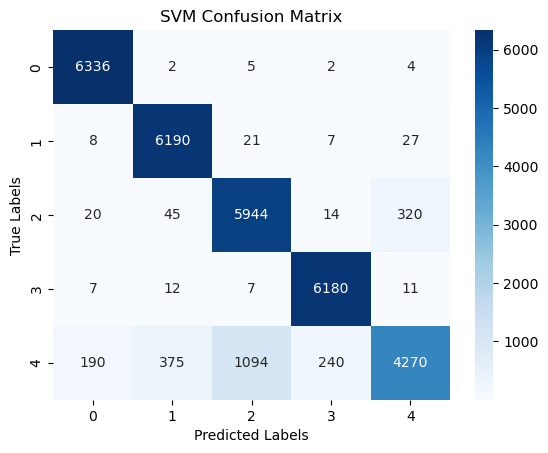

               precision    recall  f1-score   support

     negative       0.97      1.00      0.98      6349
      neutral       0.93      0.99      0.96      6253
     positive       0.84      0.94      0.89      6343
very negative       0.96      0.99      0.98      6217
very positive       0.92      0.69      0.79      6169

     accuracy                           0.92     31331
    macro avg       0.92      0.92      0.92     31331
 weighted avg       0.92      0.92      0.92     31331



In [24]:
from sklearn.metrics import classification_report, confusion_matrix

nb_report = classification_report(y_test, y_pred)
nb_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(nb_report)


# Multinomial Naive Bayes Classifier

In [25]:
# Multinomial Naive Bayes
mnb = MultinomialNB()

In [26]:
param_grid = {
    'alpha': [0.1, 1, 10]
}

In [27]:
grid_search = GridSearchCV(mnb, param_grid, cv=5,n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10]})

In [28]:
best_mnb = grid_search.best_estimator_

In [29]:
# scores = cross_val_score(best_mnb, X_train, y_train, cv=5)
# print("Multinomial Naive Bayes cross-validation scores:", scores)
# print("Multinomial Naive Bayes mean cross-validation score:", scores.mean())

In [30]:
best_mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [31]:
y_pred = best_mnb.predict(X_test)

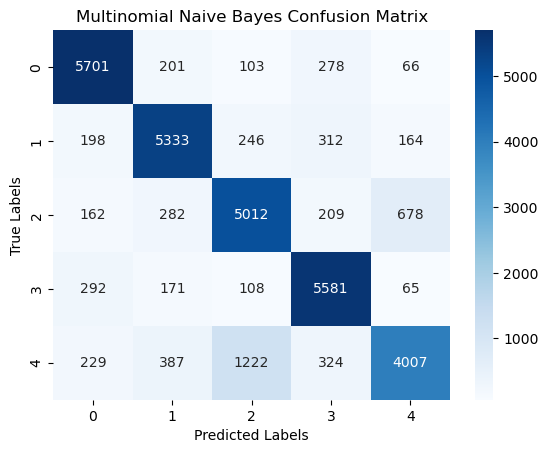

               precision    recall  f1-score   support

     negative       0.87      0.90      0.88      6349
      neutral       0.84      0.85      0.84      6253
     positive       0.75      0.79      0.77      6343
very negative       0.83      0.90      0.86      6217
very positive       0.80      0.65      0.72      6169

     accuracy                           0.82     31331
    macro avg       0.82      0.82      0.82     31331
 weighted avg       0.82      0.82      0.82     31331



In [32]:

nb_report = classification_report(y_test, y_pred)
nb_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Multinomial Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(nb_report)


# Logistic Regression

In [33]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = clf.predict(X_test)

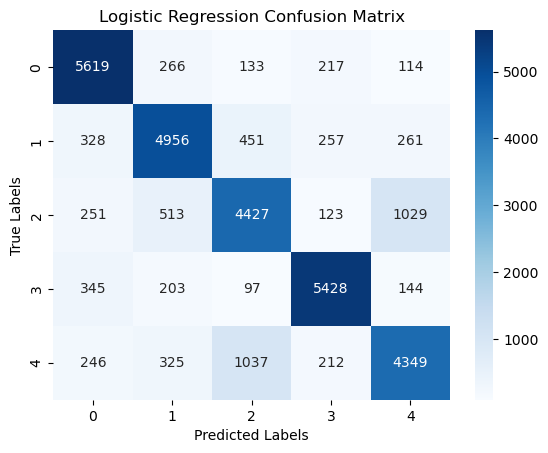

               precision    recall  f1-score   support

     negative       0.83      0.89      0.86      6349
      neutral       0.79      0.79      0.79      6253
     positive       0.72      0.70      0.71      6343
very negative       0.87      0.87      0.87      6217
very positive       0.74      0.70      0.72      6169

     accuracy                           0.79     31331
    macro avg       0.79      0.79      0.79     31331
 weighted avg       0.79      0.79      0.79     31331



In [35]:
nb_report = classification_report(y_test, y_pred)
nb_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(nb_report)

# MLP Classifier

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
mlp = MLPClassifier()

In [38]:
param_grid = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
}

In [ ]:
grid_search = GridSearchCV(mlp, param_grid=param_grid,n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
mlp_best = MLPClassifier(**grid_search.best_params_)
mlp_best.fit(X_train, y_train)

In [68]:
y_pred = mlp_best.predict(X_test)

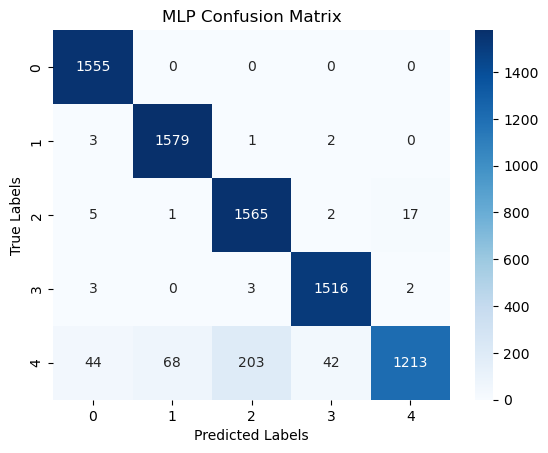

               precision    recall  f1-score   support

     negative       0.97      1.00      0.98      1555
      neutral       0.96      1.00      0.98      1585
     positive       0.88      0.98      0.93      1590
very negative       0.97      0.99      0.98      1524
very positive       0.98      0.77      0.87      1570

     accuracy                           0.95      7824
    macro avg       0.95      0.95      0.95      7824
 weighted avg       0.95      0.95      0.95      7824



In [69]:
from sklearn.metrics import classification_report, confusion_matrix

nb_report = classification_report(y_test, y_pred)
nb_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("MLP Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(nb_report)

In [ ]:
# import pickle

# # Assume 'model' is the trained model object
# # and 'filename' is the desired filename to save the model
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)


# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [52]:
rf = RandomForestClassifier(random_state=42, **best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [63]:
y_pred = rf.predict(X_test)

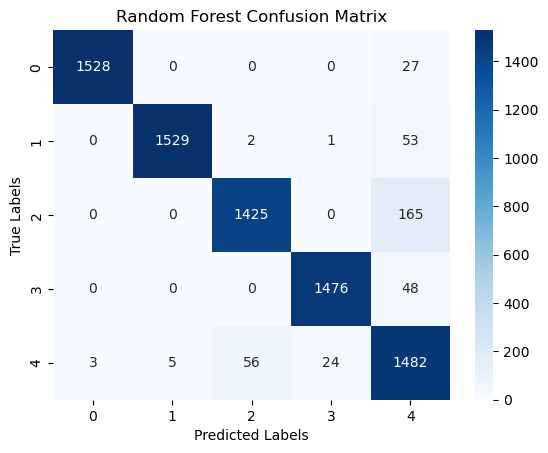

               precision    recall  f1-score   support

     negative       1.00      0.98      0.99      1555
      neutral       1.00      0.96      0.98      1585
     positive       0.96      0.90      0.93      1590
very negative       0.98      0.97      0.98      1524
very positive       0.83      0.94      0.89      1570

     accuracy                           0.95      7824
    macro avg       0.95      0.95      0.95      7824
 weighted avg       0.95      0.95      0.95      7824



In [67]:

nb_report = classification_report(y_test, y_pred)
nb_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print(nb_report)

Continued In emotion_detection.ipynb file...